In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

In [366]:
data=pd.read_csv('data/training_v2.csv')
data_valid=pd.read_csv('data/unlabeled.csv')
data_result=data_valid[['encounter_id']]

In [367]:
data_result.head()

,encounter_id
0,2
1,5
2,7
3,8
4,10


In [253]:
data.shape

(91713, 186)

In [254]:
data_valid.shape

(39308, 186)

In [5]:
profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [7]:
profile.to_file(output_file="training_data_report.html")

In [13]:
# Drop columns with the same value and duplicates. Count target variable proportion again
# We can see that class 1 was oversampled in our train set. We remove duplicate rows for now. Class 0 remained the same.

In [368]:
cols_to_drop = [col for col in data.columns if data[col].nunique(dropna=False) == 1]
data.drop(cols_to_drop, axis=1, inplace=True)
data = data[~data.duplicated()]

data_valid.drop(cols_to_drop, axis=1, inplace=True)
print('Number of zeros:',len(data[data['hospital_death']==0]))
print('Number of ones:',len(data[data['hospital_death']==1]))
print('Ratio:',len(data[data['hospital_death']==1])/data.shape[0])

Number of zeros: 83798
Number of ones: 7915
Ratio: 0.08630183289173836


In [256]:
# Let's deal with missing values

In [369]:
def get_percentage_missing(series):
    """ Calculates percentage of NaN values in DataFrame
    :param series: Pandas DataFrame object
    :return: float
    """
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 2)

In [370]:
# Iterate over columns in DataFrame and delete those with where >30% of the values are null/NaN
for name, values in data.iteritems():
    if get_percentage_missing(data[name]) > 0.4:
        print("Deleting Column %r: " % (name) )
        data.drop(name, axis=1, inplace=True)
        data_valid.drop(name, axis=1, inplace=True)

Deleting Column 'albumin_apache': 
Deleting Column 'bilirubin_apache': 
Deleting Column 'fio2_apache': 
Deleting Column 'paco2_apache': 
Deleting Column 'paco2_for_ph_apache': 
Deleting Column 'pao2_apache': 
Deleting Column 'ph_apache': 
Deleting Column 'urineoutput_apache': 
Deleting Column 'd1_diasbp_invasive_max': 
Deleting Column 'd1_diasbp_invasive_min': 
Deleting Column 'd1_mbp_invasive_max': 
Deleting Column 'd1_mbp_invasive_min': 
Deleting Column 'd1_sysbp_invasive_max': 
Deleting Column 'd1_sysbp_invasive_min': 
Deleting Column 'h1_diasbp_invasive_max': 
Deleting Column 'h1_diasbp_invasive_min': 
Deleting Column 'h1_mbp_invasive_max': 
Deleting Column 'h1_mbp_invasive_min': 
Deleting Column 'h1_sysbp_invasive_max': 
Deleting Column 'h1_sysbp_invasive_min': 
Deleting Column 'd1_albumin_max': 
Deleting Column 'd1_albumin_min': 
Deleting Column 'd1_bilirubin_max': 
Deleting Column 'd1_bilirubin_min': 
Deleting Column 'd1_inr_max': 
Deleting Column 'd1_inr_min': 
Deleting Column 

In [259]:
# Deleting columns with the same values
data.drop(['aids','arf_apache','cirrhosis','gcs_unable_apache','hepatic_failure',
             'icu_stay_type','immunosuppression','leukemia','lymphoma',
              'solid_tumor_with_metastasis'], axis=1, inplace=True)
data.drop(['encounter_id','hospital_id','icu_id','patient_id',],axis=1, inplace=True)
data_valid.drop(['aids','arf_apache','cirrhosis','gcs_unable_apache','hepatic_failure',
             'icu_stay_type','immunosuppression','leukemia','lymphoma',
              'solid_tumor_with_metastasis'], axis=1, inplace=True)
# data.drop([],axis=1, inplace=True)
data_valid.drop(['encounter_id','hospital_id','icu_id','patient_id',],axis=1, inplace=True)

In [371]:
# Version 2
# Deleting columns with the same values
data.drop(['aids','arf_apache','gcs_unable_apache','hepatic_failure',
              'solid_tumor_with_metastasis'], axis=1, inplace=True)
data.drop(['encounter_id','hospital_id','icu_id','patient_id',],axis=1, inplace=True)
data_valid.drop(['aids','arf_apache','gcs_unable_apache','hepatic_failure',
              'solid_tumor_with_metastasis'], axis=1, inplace=True)
# data.drop([],axis=1, inplace=True)
data_valid.drop(['encounter_id','hospital_id','icu_id','patient_id',],axis=1, inplace=True)

In [260]:
# Let's export df to csv and eyeball data
data.to_csv('data/filtered_data.csv')
must_categorical = ['apache_post_operative','diabetes_mellitus','elective_surgery','ethnicity',
                    'gcs_eyes_apache','gender','hospital_admit_source',
                    'icu_admit_source','icu_type','intubated_apache',
                   'ventilated_apache','apache_3j_bodysystem','apache_2_bodysystem']
#maybe_categorical = ['IS_EXISTS_PMT_KASPIKZ_LAST3', 'ACTUAL_KASPI_GOLD_FLAG', 'ZP_KASPI_GOLD_FLAG', 'IS_EXISTS_DEP', 'BONUS_OPERATIONS_FLAG']
#geo_categorical = ['FST_CONTRACT_CITY', 'LAST_CONTRACT_CITY', 'PROFILE_CITY']

In [373]:
# Let's export df to csv and eyeball data
data.to_csv('data/filtered_data.csv')
must_categorical = ['apache_post_operative','diabetes_mellitus','elective_surgery','ethnicity',
                    'gcs_eyes_apache','gender','hospital_admit_source',
                    'icu_admit_source','icu_type','intubated_apache',
                   'ventilated_apache','apache_3j_bodysystem','apache_2_bodysystem','cirrhosis',
                     'icu_stay_type','immunosuppression','leukemia','lymphoma']
#maybe_categorical = ['IS_EXISTS_PMT_KASPIKZ_LAST3', 'ACTUAL_KASPI_GOLD_FLAG', 'ZP_KASPI_GOLD_FLAG', 'IS_EXISTS_DEP', 'BONUS_OPERATIONS_FLAG']
#geo_categorical = ['FST_CONTRACT_CITY', 'LAST_CONTRACT_CITY', 'PROFILE_CITY']

In [374]:
from sklearn.preprocessing import LabelEncoder
print("process categorical columns ...")

for col in must_categorical:
    lbl = LabelEncoder()
    lbl.fit(list(data[col].values.astype('str')) + list(data[col].values.astype('str')))
    data[col] = lbl.transform(list(data[col].values.astype('str')))
    data_valid[col] = lbl.transform(list(data_valid[col].values.astype('str')))

process categorical columns ...


In [375]:
data.shape

(91713, 102)

In [376]:
data_valid.shape

(39308, 102)

In [377]:
data.fillna(-1, inplace=True)
data_Y = data['hospital_death']
data.drop(['hospital_death'], axis=1, inplace=True)

In [378]:
data_valid.fillna(-1, inplace=True)
data_valid.drop(['hospital_death'], axis=1, inplace=True)

In [379]:
data.head()

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,...,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,cirrhosis,diabetes_mellitus,immunosuppression,leukemia,lymphoma,apache_3j_bodysystem,apache_2_bodysystem
0,68.0,22.73,0,2,1,180.3,4,1,0,2,...,14.1,0.10,0.05,0,1,0,0,0,9,0
1,77.0,27.42,0,2,0,160.0,4,1,0,5,...,12.7,0.47,0.29,0,1,0,0,0,8,6
2,25.0,31.95,0,2,0,172.7,3,0,0,5,...,-1.0,0.00,0.00,0,0,0,0,0,5,3
3,81.0,22.64,1,2,0,165.1,8,2,0,2,...,8.0,0.04,0.03,0,0,0,0,0,0,0
4,19.0,-1.00,0,2,1,188.0,15,0,0,5,...,-1.0,-1.00,-1.00,0,0,0,0,0,10,7


In [380]:
data_valid.head()

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,...,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,cirrhosis,diabetes_mellitus,immunosuppression,leukemia,lymphoma,apache_3j_bodysystem,apache_2_bodysystem
0,56.0,21.102439,0,2,1,180.3,3,0,0,6,...,4.7,0.13,0.08,0,0,0,0,0,7,4
1,-1.0,19.500595,1,2,0,145.0,8,2,0,5,...,3.0,0.09,0.03,0,0,0,0,0,7,4
2,66.0,32.518596,1,0,1,170.2,8,2,0,0,...,10.0,0.03,0.02,0,0,0,0,0,0,0
3,64.0,20.798520,0,2,1,182.8,8,2,0,5,...,7.1,0.19,0.17,0,0,1,0,0,8,6
4,56.0,-1.000000,0,2,1,-1.0,3,0,0,6,...,14.1,0.50,0.42,0,0,0,0,0,7,4


In [381]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(data, data_Y, test_size=0.1)

In [280]:
X_train.shape

(82541, 96)

In [281]:
y_train.shape

(82541,)

In [282]:
X_test.shape

(9172, 96)

In [283]:
y_test.shape

(9172,)

In [382]:
train=data
train_Y=data_Y

In [398]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
# 
params = {    
    'learning_rate': 0.001,
    'objectvie': 'binary',
    'metrics': 'auc',
    'is_unbalance': 'true', # replaced with scale_pos_weight argument
    'num_leaves': 7,  # 2^max_depth - 1
    'max_depth': 4,  # -1 means no limit
    'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
    'max_bin': 100,  # Number of bucketed bin for feature values
    'subsample': 0.85,  # Subsample ratio of the training instance.
    'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
    'colsample_bytree': 0.9,  # Subsample ratio of columns when constructing each tree.
    'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
    #'scale_pos_weight':4 # because training data is extremely unbalanced 
         }
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

NUM_ROUNDS = 100000
VERBOSE_EVAL = 1000
STOP_ROUNDS = 1000
print("model ...")
model = lgb.LGBMClassifier(**params, n_estimators = NUM_ROUNDS, nthread = 4, n_jobs = -1)

for fold_n, (train_index, test_index) in enumerate(folds.split(train, train_Y)):
    print('Fold:', fold_n)
    X_train, X_valid = train.iloc[train_index], train.iloc[test_index]
    y_train, y_valid = train_Y.iloc[train_index], train_Y.iloc[test_index]
    print('total y_train:', y_train.count(),'1 ytrain:', y_train.sum())
    
    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='auc',
            verbose=VERBOSE_EVAL, early_stopping_rounds=STOP_ROUNDS)
    
    y_predicted = model.predict(X_test, num_iteration=model.best_iteration_)
    y_result=model.predict_proba(data_valid, num_iteration=model.best_iteration_)[:,1]


model ...
Fold: 0
total y_train: 73370 1 ytrain: 6332
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.873175	valid_1's auc: 0.872926
[2000]	training's auc: 0.880703	valid_1's auc: 0.879817
[3000]	training's auc: 0.886492	valid_1's auc: 0.884778
[4000]	training's auc: 0.89069	valid_1's auc: 0.888217
[5000]	training's auc: 0.893877	valid_1's auc: 0.890667
[6000]	training's auc: 0.896423	valid_1's auc: 0.892483
[7000]	training's auc: 0.898608	valid_1's auc: 0.893891
[8000]	training's auc: 0.900525	valid_1's auc: 0.895051
[9000]	training's auc: 0.902247	valid_1's auc: 0.896017
[10000]	training's auc: 0.903837	valid_1's auc: 0.89684
[11000]	training's auc: 0.905302	valid_1's auc: 0.897525
[12000]	training's auc: 0.906673	valid_1's auc: 0.898105
[13000]	training's auc: 0.907988	valid_1's auc: 0.898608
[14000]	training's auc: 0.909246	valid_1's auc: 0.899092
[15000]	training's auc: 0.910459	valid_1's auc: 0.899513
[16000]	training's auc: 0.91163	valid_1

[18000]	training's auc: 0.915165	valid_1's auc: 0.895178
[19000]	training's auc: 0.916247	valid_1's auc: 0.895418
[20000]	training's auc: 0.917301	valid_1's auc: 0.895635
[21000]	training's auc: 0.918339	valid_1's auc: 0.895838
[22000]	training's auc: 0.919334	valid_1's auc: 0.896037
[23000]	training's auc: 0.920307	valid_1's auc: 0.896206
[24000]	training's auc: 0.921256	valid_1's auc: 0.896373
[25000]	training's auc: 0.922181	valid_1's auc: 0.896514
[26000]	training's auc: 0.923096	valid_1's auc: 0.896646
[27000]	training's auc: 0.923998	valid_1's auc: 0.896765
[28000]	training's auc: 0.924872	valid_1's auc: 0.896886
[29000]	training's auc: 0.925731	valid_1's auc: 0.897012
[30000]	training's auc: 0.926568	valid_1's auc: 0.897131
[31000]	training's auc: 0.927398	valid_1's auc: 0.897232
[32000]	training's auc: 0.928201	valid_1's auc: 0.897311
[33000]	training's auc: 0.928991	valid_1's auc: 0.897358
[34000]	training's auc: 0.929775	valid_1's auc: 0.897431
[35000]	training's auc: 0.93054

[60000]	training's auc: 0.945344	valid_1's auc: 0.905295
[61000]	training's auc: 0.945894	valid_1's auc: 0.905297
Early stopping, best iteration is:
[60576]	training's auc: 0.945661	valid_1's auc: 0.905314


<Figure size 1440x1440 with 0 Axes>

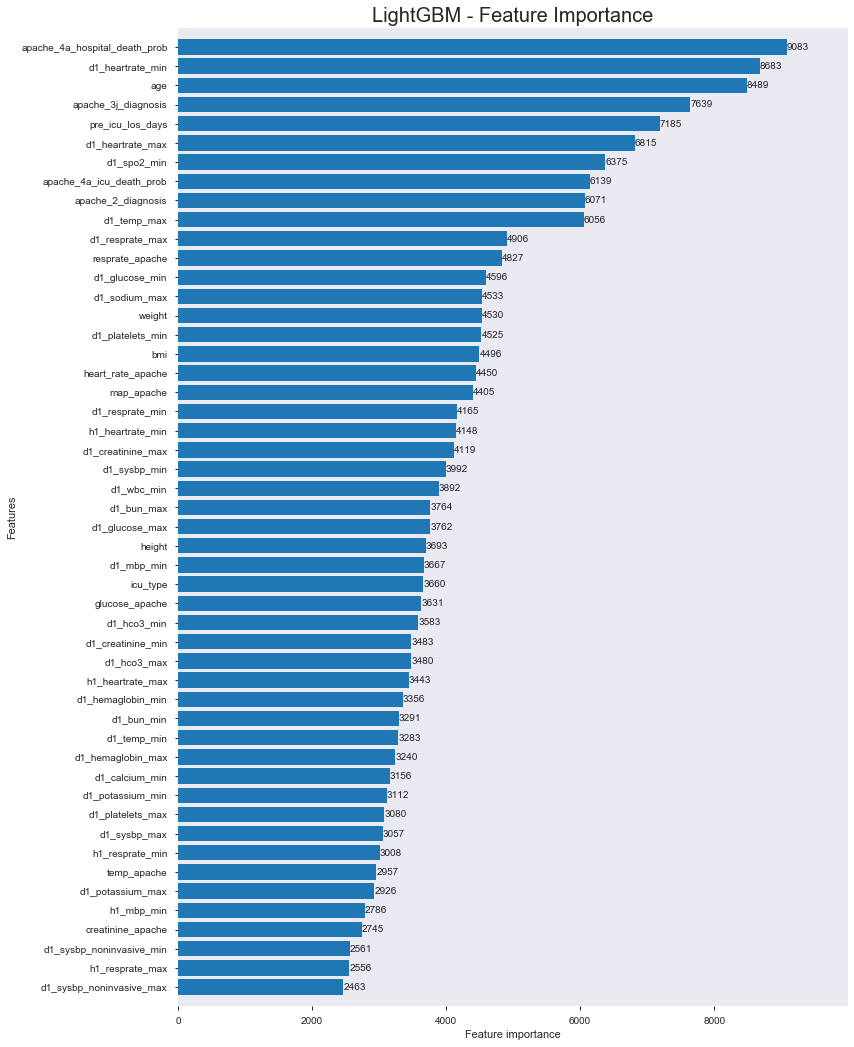

In [393]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=20)
plt.show()

In [351]:
y_predicted = model.predict(X_test)
print(X_test.shape[0])
y_predicted_proba = model.predict_proba(X_test)


9172


In [386]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
confusion_matrix(y_test, y_predicted)

array([[6973, 1386],
       [ 117,  696]])

In [387]:
print('f1',f1_score(y_test, y_predicted, average='macro'))
print('roc_auc_score', roc_auc_score(y_test, y_predicted_proba[:,1]))

f1 0.6917705825988704
roc_auc_score 0.4990209490562426


In [362]:
data_valid.head()

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_type,pre_icu_los_days,...,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,diabetes_mellitus,apache_3j_bodysystem,apache_2_bodysystem
0,56.0,21.102439,0,2,1,180.3,3,0,6,0.104167,...,4.8,135.0,134.0,4.7,4.7,0.13,0.08,0,7,4
1,-1.0,19.500595,1,2,0,145.0,8,2,5,0.230556,...,4.4,140.0,140.0,3.0,3.0,0.09,0.03,0,7,4
2,66.0,32.518596,1,0,1,170.2,8,2,0,0.140972,...,4.5,135.0,130.0,14.8,10.0,0.03,0.02,0,0,0
3,64.0,20.798520,0,2,1,182.8,8,2,5,0.002083,...,4.0,138.0,133.0,9.7,7.1,0.19,0.17,0,8,6
4,56.0,-1.000000,0,2,1,-1.0,3,0,6,0.004861,...,3.5,150.0,134.0,14.5,14.1,0.50,0.42,0,7,4


In [399]:
data_result['hospital_death']=y_result

In [400]:
data_result.head()

,encounter_id,hospital_death
0,2,0.172182
1,5,0.199213
2,7,0.181983
3,8,0.594458
4,10,0.942687


In [401]:
data_result.to_csv('results/model_18012020_8.csv', index=False)